In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

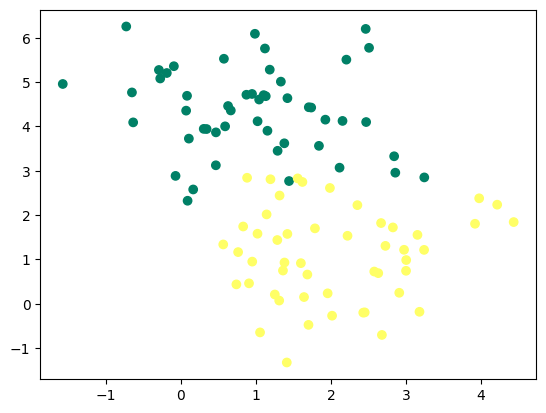

In [141]:
X,y=make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
m=len(y)
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.show()

In [142]:
#initialisation
def initialisation(X):
    W=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return (W,b)

In [143]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A


In [144]:
#loss_function
def loss_function(A,y):
    L=(-1/m)*np.sum(y*np.log(A)+(1-y)*np.log(1-A))
    return L

In [145]:
#gradient
def gradient(A,X,y):
    dw=(1/m)*(np.dot(X.T,A-y))
    db=(1/m)*np.sum(A-y)
    return (dw,db)

In [146]:
#update
def update(W,b,dw,db,learning_rate):
    W=W-learning_rate*dw
    b=b-learning_rate*db
    return W,b

In [147]:
def predict(X, W, b):
    A = model(X, W, b)
    y_pred = (A >= 0.5).astype(int)  # Convert probabilities to binary predictions
    return y_pred


In [155]:
def artificial_neuron(X, y, learning_rate=0.1, n_iter=50):
    W, b = initialisation(X)
    loss_history = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss = loss_function(A, y)
        loss_history.append(Loss)
        dw, db = gradient(A, X, y)
        W, b = update(W, b, dw, db, learning_rate)
    plt.plot(loss_history)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss Over Iterations')
    plt.show()
    y_pred=predict(X,W,b)
    return W, b, loss_history ,y_pred,A

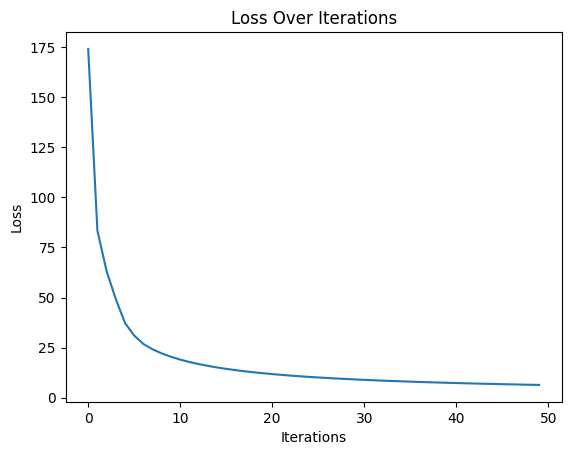

In [153]:
W,b,loss_history,y_pred,A=artificial_neuron(X,y)

In [154]:
A.shape

(100, 100)

In [151]:
y_pred

array([[1, 1, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 0, 1],
       ...,
       [1, 1, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 0, 1]])